# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
#I am not sure where it's getting my api, but it is not puling from my api_key file.
#the api_key had an extra letter, so I needed to remove one digit from the end.
#weather_api_key= weather_api_key[:-1]
#print(weather_api_key)

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [33]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 638


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [34]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=d907a8276184d691ad6164a9453b4235&units=metric&q=


In [35]:
# Define an empty list to fetch the weather data for each city
#city_data = []
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
x = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city 
    #print(city, city_url)
 
    #  Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
        
    # Run an API request for each of the cities
    try:
    # if True: # Used for debugging.
    
    # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() 
        (city_weather["coord"]["lat"])
     
        # print(city_weather) # Used for debugging.
     
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date =  dt.datetime.utcfromtimestamp(city_weather["dt"])
        #If need to print later, use this variable =city_date.strftime('%Y-%m-%d %H:%M:%S')
        #Append the City information into city_data list
        #for debugging    
        x+=1
        city_data.append({"City": city, 
                      "Lat": city_lat, 
                      "Lng": city_lng, 
                      "Max Temp": city_max_temp,
                      "Humidity": city_humidity,
                      "Cloudiness": city_clouds,
                      "Wind Speed": city_wind,
                       "Country": city_country,
                       "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
   
    # For debugging, stop after we get five cities with weather data.
    #if x > 5:
     #   break

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pacific grove
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | kurumkan
Processing Record 6 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 7 of Set 1 | beringovskiy
Processing Record 8 of Set 1 | bambous virieux
Processing Record 9 of Set 1 | champerico
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | skjervoy
Processing Record 13 of Set 1 | mentougou
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | santa isabel do rio negro
Processing Record 17 of Set 1 | coihaique
Processing Record 18 of Set 1 | pondicherry
Processing Record 19 of Set 1 | kiskunfelegyhaza
Processing Record 20 of Set 1 | kapaa
Processing Record

Processing Record 38 of Set 4 | cap malheureux
Processing Record 39 of Set 4 | nome
Processing Record 40 of Set 4 | ormara
Processing Record 41 of Set 4 | taburi
City not found. Skipping...
Processing Record 42 of Set 4 | yumen
Processing Record 43 of Set 4 | camana
Processing Record 44 of Set 4 | exeter
Processing Record 45 of Set 4 | tlahualilo
City not found. Skipping...
Processing Record 46 of Set 4 | fortuna
Processing Record 47 of Set 4 | dawei
Processing Record 48 of Set 4 | castro
Processing Record 49 of Set 4 | codrington
Processing Record 0 of Set 5 | locri
Processing Record 1 of Set 5 | tres lagoas
Processing Record 2 of Set 5 | ahipara
Processing Record 3 of Set 5 | crab hill
City not found. Skipping...
Processing Record 4 of Set 5 | vila velha
Processing Record 5 of Set 5 | torbay
Processing Record 6 of Set 5 | xining
Processing Record 7 of Set 5 | rundu
Processing Record 8 of Set 5 | port augusta
Processing Record 9 of Set 5 | ilulissat
Processing Record 10 of Set 5 | sot

Processing Record 29 of Set 8 | najran
Processing Record 30 of Set 8 | roald
Processing Record 31 of Set 8 | yenagoa
Processing Record 32 of Set 8 | umm ruwabah
City not found. Skipping...
Processing Record 33 of Set 8 | inhambane
Processing Record 34 of Set 8 | benjamin constant
Processing Record 35 of Set 8 | urfa
City not found. Skipping...
Processing Record 36 of Set 8 | saint-michel-des-saints
Processing Record 37 of Set 8 | saint george
Processing Record 38 of Set 8 | san quintin
Processing Record 39 of Set 8 | beaufort
Processing Record 40 of Set 8 | milingimbi
City not found. Skipping...
Processing Record 41 of Set 8 | upernavik
Processing Record 42 of Set 8 | fuchu
Processing Record 43 of Set 8 | tiznit
Processing Record 44 of Set 8 | bandundu
Processing Record 45 of Set 8 | bogorodskoye
Processing Record 46 of Set 8 | lakes entrance
Processing Record 47 of Set 8 | mount gambier
Processing Record 48 of Set 8 | russell
Processing Record 49 of Set 8 | umzimvubu
City not found. S

Processing Record 13 of Set 12 | klaksvik
Processing Record 14 of Set 12 | havelock
Processing Record 15 of Set 12 | chemax
Processing Record 16 of Set 12 | trat
Processing Record 17 of Set 12 | valparaiso
Processing Record 18 of Set 12 | gidole
Processing Record 19 of Set 12 | namatanai
Processing Record 20 of Set 12 | fukuma
Processing Record 21 of Set 12 | yabrud
Processing Record 22 of Set 12 | aksarka
Processing Record 23 of Set 12 | kahului
Processing Record 24 of Set 12 | dalvik
Processing Record 25 of Set 12 | shepsi
Processing Record 26 of Set 12 | palu
Processing Record 27 of Set 12 | pisco
Processing Record 28 of Set 12 | ewo
Processing Record 29 of Set 12 | kouango
Processing Record 30 of Set 12 | goderich
Processing Record 31 of Set 12 | ilyich
Processing Record 32 of Set 12 | hamilton
Processing Record 33 of Set 12 | pangnirtung
Processing Record 34 of Set 12 | wiarton
Processing Record 35 of Set 12 | jacareacanga
Processing Record 36 of Set 12 | natal
Processing Record 3

In [37]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)
   
# Show Record Count
print(city_data_df.count())

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64


In [38]:
# Display sample data
city_data_df.head()
#will need to clean up date and cloudiness in csv.

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pacific grove,36.6177,-121.9166,12.46,85,0,2.24,US,2023-02-08 02:29:56
1,jamestown,42.0970,-79.2353,2.80,93,100,5.66,US,2023-02-08 02:29:56
2,avarua,-21.2078,-159.7750,29.03,79,28,5.14,CK,2023-02-08 02:29:57
3,kurumkan,54.3000,110.3000,-18.83,89,98,1.19,RU,2023-02-08 02:29:57
4,beringovskiy,63.0500,179.3167,-27.30,94,82,3.45,RU,2023-02-08 02:29:57


In [39]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [40]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pacific grove,36.6177,-121.9166,12.46,85,0,2.24,US,2023-02-08 02:29:56
1,jamestown,42.0970,-79.2353,2.80,93,100,5.66,US,2023-02-08 02:29:56
2,avarua,-21.2078,-159.7750,29.03,79,28,5.14,CK,2023-02-08 02:29:57
3,kurumkan,54.3000,110.3000,-18.83,89,98,1.19,RU,2023-02-08 02:29:57
4,beringovskiy,63.0500,179.3167,-27.30,94,82,3.45,RU,2023-02-08 02:29:57


In [46]:
today=city_data_df["Date"][0][:10]
today

'2023-02-08'

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

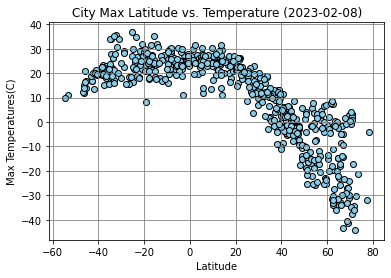

In [56]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], c="skyblue", edgecolors="black", )

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperatures(C)")
plt.title(f"City Max Latitude vs. Temperature ({today})")
plt.grid(color="grey")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

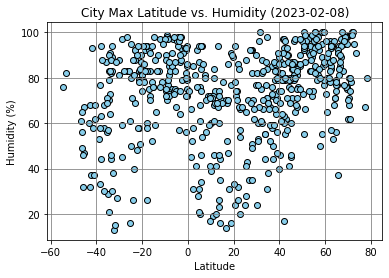

In [57]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], c="skyblue", edgecolors="black", )

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Max Latitude vs. Humidity ({today})")
plt.grid(color="grey")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

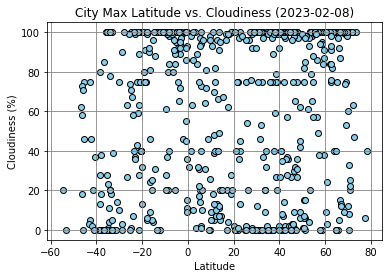

In [58]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], c="skyblue", edgecolors="black", )

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Max Latitude vs. Cloudiness ({today})")
plt.grid(color="grey")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

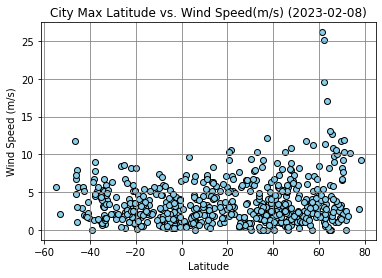

In [59]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], c="skyblue", edgecolors="black", )

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Max Latitude vs. Wind Speed(m/s) ({today})")
plt.grid(color="grey")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [121]:
# Define a function to create Linear Regression plots


# Define the linear regression function.
def linear_regression_plot(x_values, y_values, x_label, y_label):
    (m,b,rvalue, pvalue, stderr) = linear_regression(x_values, y_values)    
    line_eq=f"y={round(m,2)}x +{round(b,2)}"
    r_squared = rvalue**2

    regress_values=x_values * m + b
    
    plt.scatter(x_values, y_values, c="skyblue", edgecolors="black", )
    plt.plot(x_values,regress_values, "r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    #x_max = x_values.max()
    #x_min = x_values.min()
    #x_mid = x_min + (x_max - x_min)
    #print(x_mid)
    plt.annotate(line_eq, (0,y_values.min()+5), fontsize=15, color="red")
    plt.show()

#linear_regression_plot(city_data_df['Lat'], city_data_df['Max Temp'], 'Latitude', 'Temperature')
#linear_regression_plot(city_data_df['Lat'], city_data_df['Humidity'], 'Latitude', 'Humidity (%)')
#linear_regression_plot(city_data_df['Lat'], city_data_df['Cloudiness'], 'Latitude', 'Cloudiness')
#linear_regression_plot(city_data_df['Lat'], city_data_df['Wind Speed'], 'Latitude', 'Wind Speed (m/s)')



In [122]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]
                                       
#ouse_study_data.loc[mouse_study_data["Mouse ID"] != "g989"]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pacific grove,36.6177,-121.9166,12.46,85,0,2.24,US,2023-02-08 02:29:56
1,jamestown,42.0970,-79.2353,2.80,93,100,5.66,US,2023-02-08 02:29:56
3,kurumkan,54.3000,110.3000,-18.83,89,98,1.19,RU,2023-02-08 02:29:57
4,beringovskiy,63.0500,179.3167,-27.30,94,82,3.45,RU,2023-02-08 02:29:57
6,champerico,14.3000,-91.9167,25.92,70,7,2.94,GT,2023-02-08 02:29:58


In [123]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,avarua,-21.2078,-159.7750,29.03,79,28,5.14,CK,2023-02-08 02:29:57
5,bambous virieux,-20.3428,57.7575,26.14,83,40,5.14,MU,2023-02-08 02:29:58
7,atuona,-9.8000,-139.0333,26.27,74,28,7.37,PF,2023-02-08 02:29:59
11,punta arenas,-53.1500,-70.9167,11.06,82,0,2.06,CL,2023-02-08 02:30:00
12,bredasdorp,-34.5322,20.0403,18.54,79,11,3.16,ZA,2023-02-08 02:30:00


###  Temperature vs. Latitude Linear Regression Plot

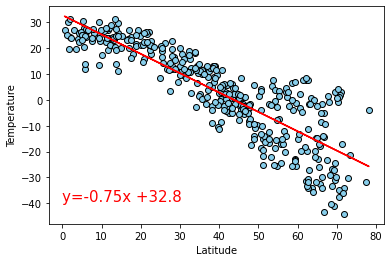

In [124]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Temperature')

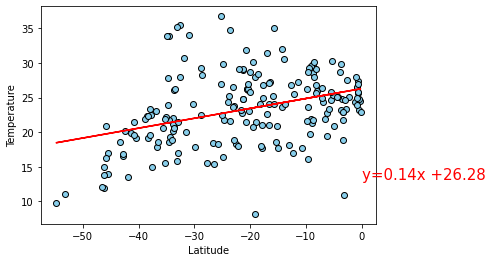

In [111]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Temperature')

**Discussion about the linear relationship:** Temperatures north of the equator are more similar and begin to spread out at the 45 parallel where as Temperaturs are more sporatic south of the equator with some clustering along the regression line.

### Humidity vs. Latitude Linear Regression Plot

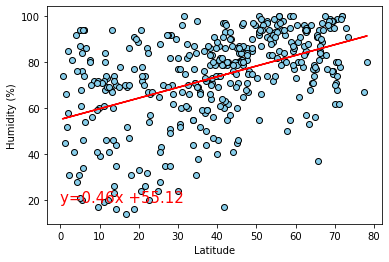

In [112]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity (%)')

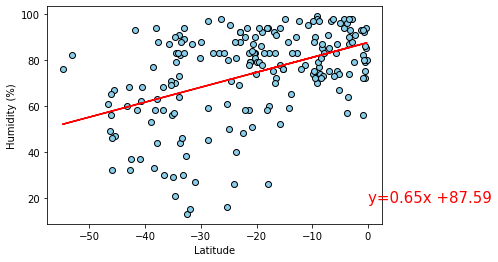

In [113]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity (%)')

**Discussion about the linear relationship:** The slope is fairly similar but their intercepts are different. As you move away from the equator, you'll see the southern hemisphere doesn't react the same as when you move north and way from the equator. 

### Cloudiness vs. Latitude Linear Regression Plot

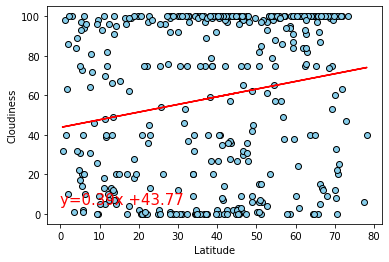

In [114]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')


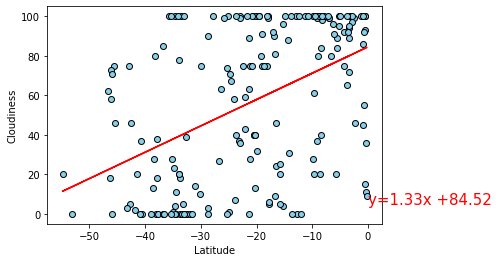

In [116]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** In the northern hemisphere, latitude doesn't greatly affect cloud coverage, however the South has an inverse relatonship as you move more south, you have less cloud cover

### Wind Speed vs. Latitude Linear Regression Plot

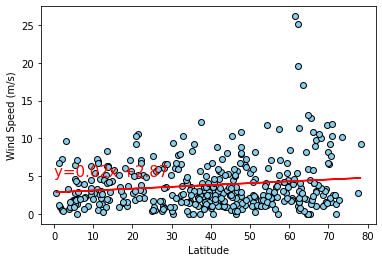

In [119]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude','Wind Speed (m/s)')

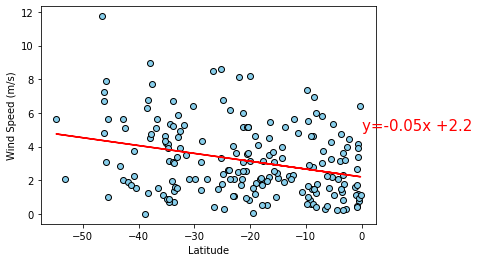

In [120]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude','Wind Speed (m/s)')

**Discussion about the linear relationship:** In the northern hemisphere, much of the wind speeds reported will hover under 5 and stays fairly consistent until you reach the 68th parallel where you'll find parts that experience greater winds. The southern hemisphere you'll see wind speeds fan out the further south you go however, wind speeds don't reach above 12. Winds can exceed 35 in the northern hemisphere. 